In [3]:
import pandas as pd
import category_encoders as ce

df=pd.read_csv('HW3_hr-analytics.csv')
df_notdigit=df.select_dtypes(include=object)

#將不是數字的做frequency encoding
for i in df_notdigit.columns:
    df[i] = df[i].fillna("None")
df_fq=df.copy()
count=ce.CountEncoder()
df_fq=count.fit(df_fq).transform(df_fq)

#填補缺失值
df_fq=df_fq.fillna(df_fq.mean()) 
print(df_fq)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [4]:
#分割測試集與訓練集
import numpy as np
y = df_fq.left
x = df_fq.drop("left", axis = 1)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

accuracy： 0.7793333333333334
precision： 0.571449080835029
recall： 0.3031427950445555


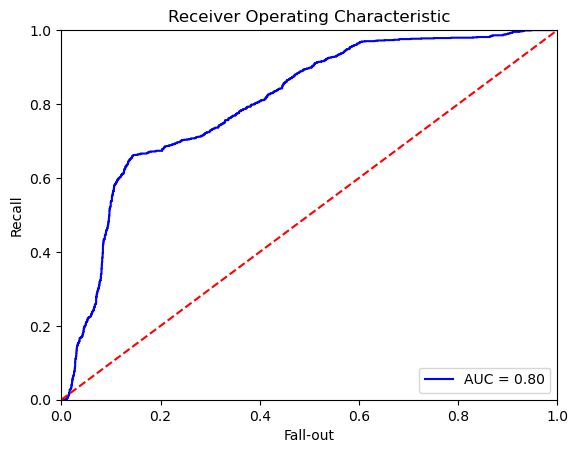

In [5]:
#訓練模型
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logisticModel = LogisticRegression(max_iter=10000)
logisticModel.fit(train_x, train_y)

#模型評估
#accuracy是預測出的label是否正確，但是不能分辨出假陽性、假陰性，(TP+TN)/(TP+TN+FP+FN)
scores = cross_val_score(logisticModel,test_x,test_y,cv=5)  
print ('accuracy：',np.mean(scores))

#precision，TP/(TP+FP)  
precisions = cross_val_score(logisticModel, test_x, test_y, cv=5, scoring='precision')  
print('precision：', np.mean(precisions))  

#recall，R=TP/(TP+FN)
recalls = cross_val_score(logisticModel, test_x, test_y, cv=5, scoring='recall')  
print('recall：', np.mean(recalls))

#用ROC曲線觀察模型的效果，若曲線下面積(AUC)越接近1，模型效果越好 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predictions = logisticModel.predict_proba(test_x)  
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions[:, 1])  
roc_auc = auc(false_positive_rate, recall)  
plt.title('Receiver Operating Characteristic')  
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show() 

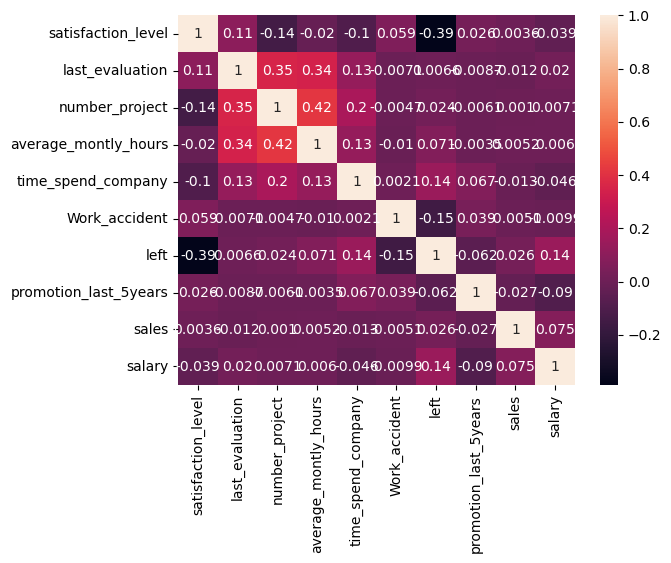

last_evaluation          0.006567
number_project           0.023787
sales                    0.026097
promotion_last_5years    0.061788
average_montly_hours     0.071287
salary                   0.143606
time_spend_company       0.144822
Work_accident            0.154622
satisfaction_level       0.388375
left                     1.000000
Name: left, dtype: float64


In [80]:
#用heatmap觀察哪個特徵與離職率關聯最高
#明顯的看得出來是staisfaction_level關聯度最高，而最不相關的是last_evaluation          
import seaborn as sns

correlation_matrix = df_fq.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
print(abs(correlation_matrix["left"]).sort_values())

accuracy： 0.7806666666666666
precision： 0.575309185371156
recall： 0.314349054553358


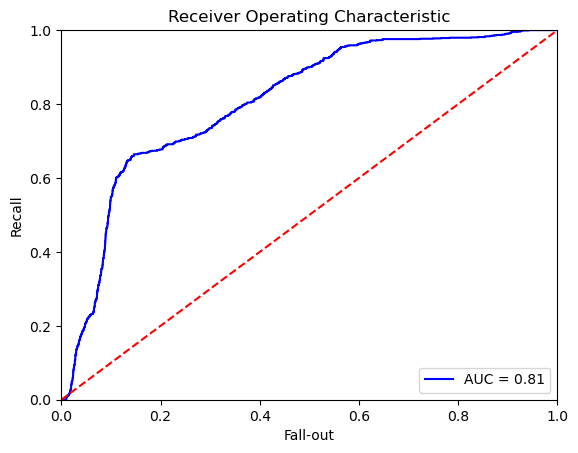

In [6]:
#把最不相關的last_evaluation去除
z=x.drop("last_evaluation", axis = 1)
train_z, test_z, train_y, test_y = train_test_split(z, y, test_size = 0.3, random_state = 42)
logisticModel = LogisticRegression(max_iter=10000)
logisticModel.fit(train_z, train_y)


#accuracy是預測出的label是否正確，但是不能分辨出假陽性、假陰性，(TP+TN)/(TP+TN+FP+FN)
scores = cross_val_score(logisticModel,test_z,test_y,cv=5)  
print ('accuracy：',np.mean(scores))

#precision，TP/(TP+FP)  
precisions = cross_val_score(logisticModel, test_z, test_y, cv=5, scoring='precision')  
print('precision：', np.mean(precisions))  

#recall，R=TP/(TP+FN)
recalls = cross_val_score(logisticModel, test_z, test_y, cv=5, scoring='recall')  
print('recall：', np.mean(recalls)) 

#去除最不相關的特徵，ACU更接近1，模型效果變好
predictions1 = logisticModel.predict_proba(test_z)  
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions1[:, 1])  
roc_auc = auc(false_positive_rate, recall)  
plt.title('Receiver Operating Characteristic')  
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show()  

accuracy： 0.7808360443748723
precision： 0.5736218160660687
recall： 0.30852264529058115


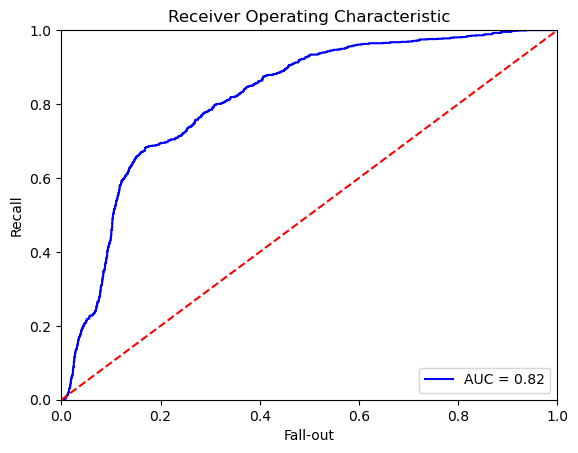

In [82]:
#標準化
from sklearn.preprocessing import StandardScaler

s = StandardScaler().fit(train_x)
trainScaler_x = s.transform(train_x) 
testScaler_x = s.transform(test_x)
logisticModel.fit(trainScaler_x, train_y)

#accuracy是預測出的label是否正確，但是不能分辨出假陽性、假陰性，(TP+TN)/(TP+TN+FP+FN)
scores = cross_val_score(logisticModel,trainScaler_x,train_y,cv=5)  
print ('accuracy：',np.mean(scores))

#precision，TP/(TP+FP)  
precisions = cross_val_score(logisticModel, trainScaler_x, train_y, cv=5, scoring='precision')  
print('precision：', np.mean(precisions))  
#recall，R=TP/(TP+FN)

recalls = cross_val_score(logisticModel, trainScaler_x, train_y, cv=5, scoring='recall')  
print('recall：', np.mean(recalls))

#標準化過後AUC的值也有更接近1，模型效果變好 
predictions2 = logisticModel.predict_proba(testScaler_x)  
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions2[:, 1])  
roc_auc = auc(false_positive_rate, recall)  
plt.title('Receiver Operating Characteristic')  
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)  
plt.legend(loc='lower right')  
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.ylabel('Recall')  
plt.xlabel('Fall-out')  
plt.show() 